### Introduction


**What is Customer Churn?**<br>
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.

We will be using **XGBoost** to build a collection of boosted trees and use continous and categorical data from IBM Base samples to predict whether or not a customer will stop using company's service. In business lingo, it is called **customer churn**. Link to dataset :

<a href="https://www.kaggle.com/datasets/blastchar/telco-customer-churn">Telco Customer Churn</a>

We will cover below steps to preprocess data and build an optimised predictive system:

* **Importing data from File**

* **Missing Data from File**
 * Identifying with Missing data
 * Dealing with Missing data
 
* **Formatting data fror XGBoost**
  * Splitting data into dependant and independant variables
  * One-Hot-Encoding
  * Converting all columns to Int, Float or Bool
  
* **Building a preliminary XGBoost Model**

* **Optimising parameters with Cross Validation and GridSearchCV**
  * Optimising the learning rate, tree depth, number of trees, gamma(for pruning) and lambda (for regularisation)
 
* **Building, Drawing, Interpreting and Evaluating the optimized XGBoost model**

  

In [6]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import seaborn as sns
sns.set_style('ticks')

In [7]:
customer_churn_df = pd.read_csv('Telco-Customer-Churn.csv')

In [8]:
customer_churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
customer_churn_df.shape

(7043, 21)

In [11]:
customer_churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
customer_churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
customer_churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
customer_churn_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
customer_churn_df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [17]:
customer_churn_df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
customer_churn_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
for col in customer_churn_df.columns:
    print(col,'--->', customer_churn_df[col].nunique())

customerID ---> 7043
gender ---> 2
SeniorCitizen ---> 2
Partner ---> 2
Dependents ---> 2
tenure ---> 73
PhoneService ---> 2
MultipleLines ---> 3
InternetService ---> 3
OnlineSecurity ---> 3
OnlineBackup ---> 3
DeviceProtection ---> 3
TechSupport ---> 3
StreamingTV ---> 3
StreamingMovies ---> 3
Contract ---> 3
PaperlessBilling ---> 2
PaymentMethod ---> 4
MonthlyCharges ---> 1585
TotalCharges ---> 6531
Churn ---> 2


Since customer_churn_df has distinct customerID for each customer, it is not helpful for predictions so we will drop it

In [20]:
customer_churn_df['customerID'].nunique()

7043

In [21]:
customer_churn_df.drop('customerID', axis = 1, inplace = True)

In [22]:
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**NOTE** Although it is OK to have whitespace in PaymentMethod names in **PaymentMethod** for **XGBoost** and classification, we can't have any whitespace if we want to draw a tree. So let's take care of that now by replacing whitespace with an underscore character _

In [23]:
customer_churn_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [24]:
customer_churn_df['PaymentMethod'].replace(' ', '_', inplace = True)

In [25]:
customer_churn_df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Similarly, we can do this for column names 

In [26]:
customer_churn_df.columns = customer_churn_df.columns.str.replace(' ', '_') #if cols have blank spaces in names 

In [27]:
customer_churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Missing Data Part 1 : Identifying Missing Data 

Unfortunately, the biggest part of any data analysis project is making sure that data is formatted and fixing it when it is not.The first part of this process is **Missing Data** 

**Missing Data** is simply a blank space, or a surrogate value like **NA**, that indicates that we failed to collect data for one of the features. For example, if we forgot to ask someone's age, or forgot to write it down then we would have blank space for that person's age.

One thing that is relatively unique about **XGBoost** is that it has default behaviour for missing data. So all wehave to do is set missing values to 0

Read more here : <a href="https://medium.com/hypatai/how-xgboost-handles-sparsities-arising-from-of-missing-data-with-an-example-90ce8e4ba9ca">Sparsity-aware Split Finding</a>


First let's see what sort of data in each column:

In [28]:
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

A lot of columns are Object and that is OK because as we run head(), there were a lot of text responses like Yes and No. However, let's verify that we are getting what we expect

In [29]:
customer_churn_df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

So **Phone Service** has type Object because it contains text, and it has only two values, Yes and No. So this is good. We would check this for every column to cross-verify that we don't have **NA**, **?** or ** ** as strings instead of Nulls which can can cause problem

In [30]:
customer_churn_df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

...we see that there are too many unique values to print, however when we try to convert **TotalCharges** to Numeric, we get parse " " error

In [31]:
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'])

ValueError: Unable to parse string " " at position 488

In [32]:
customer_churn_df[customer_churn_df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### Missing Data Part 2 : Dealing with Missing Data 

One thing that is relatively unqiue about **XGBoost** is that it determines the default behaviour for missing data. So all we have to do is identify missing values and make sure they are set to 0

However, before that let's see how many rows are missing data. If it's a lot, then we might have a problem in our hands than **XGBoost** can deal on it's own. If it's not too many, we can set it to 0

In [33]:
len(customer_churn_df[customer_churn_df['TotalCharges'] == ' '])

11

There are 11 rows where **TotalCharges** with missing data so we will be setting it to 0 

In [34]:
customer_churn_df.loc[customer_churn_df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [35]:
customer_churn_df.loc[customer_churn_df['TotalCharges'] == ' ', 'TotalCharges'] = 0

In [36]:
customer_churn_df[customer_churn_df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [148]:
customer_churn_df[customer_churn_df['TotalCharges'] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,0.0,0
753,Male,0,No,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,0.0,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,0.0,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,0.0,0
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,0.0,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,0.0,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,0.0,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,0.0,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,0.0,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,0.0,0


In [38]:
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'])

In [39]:
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now that we have dealt with missing data, we can replace all other whitespaces in entire data with underscore. **NOTE** we are only doing it so we can draw one of the **XGBoost trees**

In [40]:
customer_churn_df.replace(' ', '_', regex = True, inplace = True)
customer_churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


In [41]:
customer_churn_df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [42]:
customer_churn_df['Churn'].replace({'Yes' : 1, 'No' : 0}, inplace = True)

In [43]:
customer_churn_df['Churn'].unique()

array([0, 1], dtype=int64)

In [44]:
customer_churn_df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [45]:
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Format Data 1 : Split data into Dependant and Independent variables 

Now that we've taken care of missing data, we are ready to start formatting the data for making **XGBoost** model

The first step is to split the data into two parts :
* The columns of data that we will use to make predictions
* The columns of data that we want to predict

The reason we deal with missing data before splitting into X and Y is because if we remove rows, splitting after ensures that each row in X correctly corresponds to right value in Y

In [46]:
X = customer_churn_df.drop('Churn', axis = 1)
Y = customer_churn_df['Churn']

In [47]:
print(X)

      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No_phone_service             DSL             No          Yes   
1      

(Feature selection & Feature selection)

### Format Data Part 2 : One Hot Encoding

Now that we have split the data into two pieces, we want to take a closer look at X which contains features that we will use to make predictions. This list tells us what each variable represents and type of data (**float** or **categorical**), it should contain :

* **Gender - Category**
  * Female, Male
* **Senior Citizen - Category** 
  * 1, 0 
* **Partner - Category**
  * Yes, No
* **Dependents - Category**
  * Yes, No
* **tenure - Float**
  * 1,34,50,etc...
* **PhoneService - Category**
  * Yes, No
* **MultipleLines - Category**
  * Yes, No, No_phone_service
* **InternetService - Category**
  * DSL, Fiber_Optic, No
* **OnlineSecurity - Category**
  * Yes, No, No_internet_service
* **OnlineBackup - Category**
  * Yes, No, No_internet_service
* **DeviceProtection - Category**
  * Yes, No, No_internet_service
* **StreamingTV - Category**
  * Yes, No, No_internet_service
* **StreamingMovies - Category**
  * Yes, No, No_internet_service
* **Contract - Category**
  * Month-to-month, One_year, Two_year
* **PaperlessBilling - Category**
  * Yes, No
* **PaymentMethod - Category**
  * Electronic_check, Mailed_check, Bank_transfer_(automatic),
       Credit_card_(automatic)
* **MonthlyCharges - Float**
  * 29.85, 45, etc...
* **TotalCharges - Category**
  *  29.85, 45, etc..

In [48]:
customer_churn_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

All of the column that are Object are categorical data that needs to be changed so it can be supported by **XGBoost**. While **XGBoost** natively supports continous variables like **MonthlyCharges**, **TotalCharges**, it does not support categorical data like **PhoneService** which contains 2 different categories. Thus, in order to use categorical data with **XGBoost**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**

Why can't we use categorical data like continous values?! Let's lool at column **PaymentMethod**:
* Electronic_check
* Mailed_check
* Bank_transfer_(automatic)
* Credit_card_(automatic)

If we converted this categories into numbers like 1,2,3,4 and treated them like continous numbers then we would assume that 4 which means **Credit_card** is more similar to 3 which is **Bank_transfer** than it to 1 or 2 which are other forms of payment. That means, **XGBoost** would more likely to cluster the people with 4s and 3s together than 4s and 1s. In contrast, if we treat this Payment_method as categroical data, then we treat each one as a separate category that is no more or less similar to any other category.Thus, the likelihood of clustering people with **Mailed_check** with people who pay with **Electronic_check** is same as clustering **Mailed_check** with **Credit_card** and that approach is more reasonable.

In [49]:
pd.get_dummies(customer_churn_df['PaymentMethod']).head()

,Bank_transfer_(automatic),Credit_card_(automatic),Electronic_check,Mailed_check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [50]:
dummy_df = pd.get_dummies(customer_churn_df,columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                        'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
                                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                        'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [150]:
dummy_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


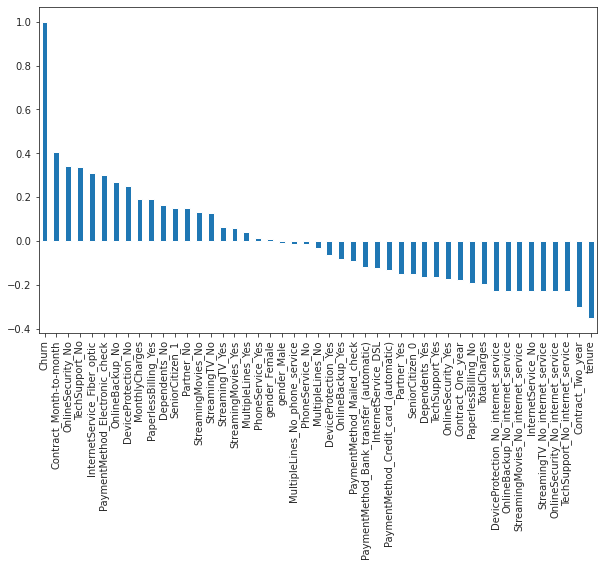

In [52]:
plt.figure(figsize = (10,6))
dummy_df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
sns.reset_orig()

In [83]:
X_encoded = dummy_df.drop('Churn', axis = 1)
Y = dummy_df['Churn']

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

### Data Exploration 

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

In [53]:
customer_churn_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

A. **Demographics** : Let us first understand the gender, age range, partner and dependent status of the customers

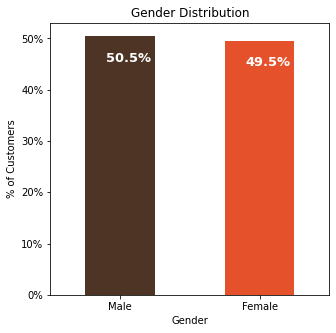

In [54]:
#gender

ax = plt.figure(figsize = (5,5))
colors = ['#4D3425','#E4512B']
ax = (customer_churn_df['gender'].value_counts()/len(customer_churn_df['gender'])*100).plot(kind = 'bar', stacked = True,
                                                                                      color = colors, rot = 0)

ax.set_xlabel('Gender')
ax.set_ylabel('% of Customers')
ax.set_title('Gender Distribution')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #chnaging formatting of yaxis to %

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.9*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)


Text(0.5, 1.0, 'Age distribution')

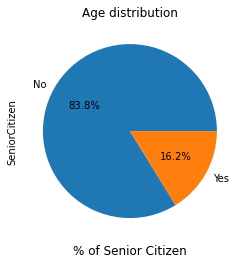

In [55]:
#Senior citizen distribution 

ax = (customer_churn_df['SeniorCitizen'].value_counts()*100.0 /len(customer_churn_df))\
.plot(kind = 'pie', autopct = '%.1f%%', labels = ['No', 'Yes'])
ax.set_xlabel('% of Senior Citizen', fontsize = 12)
ax.set_title('Age distribution', fontsize = 12)

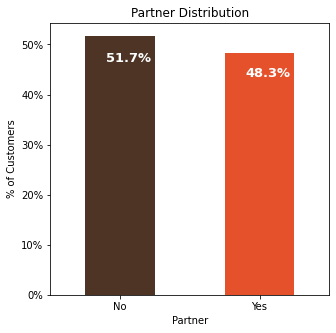

In [56]:
#partner

ax = plt.figure(figsize = (5,5))
colors = ['#4D3425','#E4512B']
ax = (customer_churn_df['Partner'].value_counts()/len(customer_churn_df['Partner'])*100).plot(kind = 'bar', stacked = True,
                                                                                      color = colors, rot = 0)

ax.set_xlabel('Partner')
ax.set_ylabel('% of Customers')
ax.set_title('Partner Distribution')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #chnaging formatting of yaxis to %

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.9*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)
    

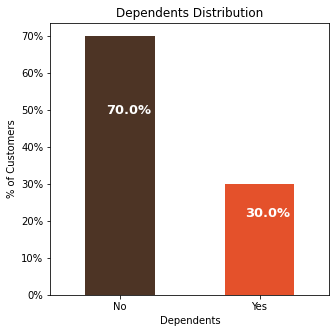

In [57]:
#dependants

ax = plt.figure(figsize = (5,5))
colors = ['#4D3425','#E4512B']
ax = (customer_churn_df['Dependents'].value_counts()/len(customer_churn_df['Partner'])*100).plot(kind = 'bar', stacked = True,
                                                                                      color = colors, rot = 0)

ax.set_xlabel('Dependents')
ax.set_ylabel('% of Customers')
ax.set_title('Dependents Distribution')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #chnaging formatting of yaxis to %

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.7*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)
    


What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.

<Figure size 720x720 with 0 Axes>

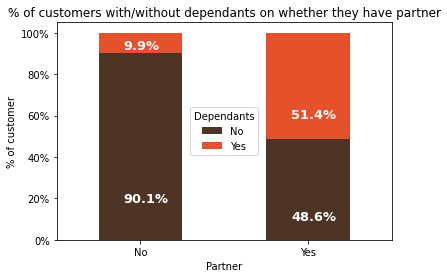

In [58]:
ax = plt.figure(figsize = (10,10))
colors = ['#4D3425','#E4512B']
# partner_dependants =customer_churn_df[['Partner','Dependents']].value_counts().unstack()
partner_dependants =customer_churn_df.groupby(['Partner', 'Dependents']).size().unstack() #unstack is pivotting


ax = (partner_dependants.T/partner_dependants.T.sum()*100).T.plot(kind = 'bar', stacked = True, color = colors, rot = 0)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customer')
ax.set_title('% of customers with/without dependants on whether they have partner')
ax.legend(loc = 'center', prop = {'size' :10}, title = 'Dependants', fontsize = 10)

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.2*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)
    

Customers who have partners, almost **half** of them also have dependanrs while rest of them are dependants. Customers who don't have partner, almost **90%** of people also don't have any dependants i.e. they are independant

**Checking % of customers with or without dependants based on Gender**

*Distribution of Dependants based on Gender is similar*

<Figure size 720x720 with 0 Axes>

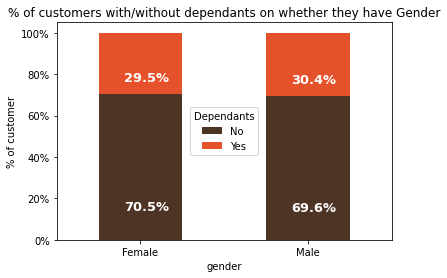

In [59]:
ax = plt.figure(figsize = (10,10))
colors = ['#4D3425','#E4512B']
partner_dependants =customer_churn_df[['gender','Dependents']].value_counts().unstack()
#partner_dependants =customer_churn_df.groupby(['Partner', 'Dependents']).size().unstack()


ax = (partner_dependants.T/partner_dependants.T.sum()*100).T.plot(kind = 'bar', stacked = True, color = colors, rot = 0)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customer')
ax.set_title('% of customers with/without dependants on whether they have Gender')
ax.legend(loc = 'center', prop = {'size' :10}, title = 'Dependants', fontsize = 10)

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.2*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)
    

**Checking % of customers with or without dependants based on Age**

*As expected, customer has very less % of dependants if they are senior citizen*

<Figure size 720x720 with 0 Axes>

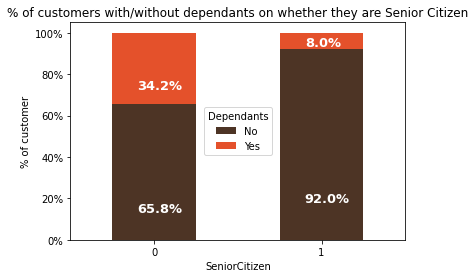

In [60]:
ax = plt.figure(figsize = (10,10))
colors = ['#4D3425','#E4512B']
partner_dependants =customer_churn_df[['SeniorCitizen','Dependents']].value_counts().unstack()
#partner_dependants =customer_churn_df.groupby(['Partner', 'Dependents']).size().unstack()


ax = (partner_dependants.T/partner_dependants.T.sum()*100).T.plot(kind = 'bar', stacked = True, color = colors, rot = 0)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customer')
ax.set_title('% of customers with/without dependants on whether they are Senior Citizen')
ax.legend(loc = 'center', prop = {'size' :10}, title = 'Dependants', fontsize = 10)

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.2*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)
    

**Checking % of customers's age status based on Gender**

*Distribution is quite similar in terms of age and Gender*

<Figure size 720x720 with 0 Axes>

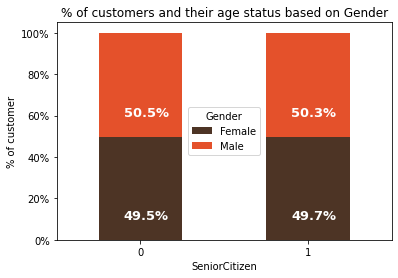

In [61]:
ax = plt.figure(figsize = (10,10))
colors = ['#4D3425','#E4512B']
partner_dependants =customer_churn_df[['SeniorCitizen','gender']].value_counts().unstack()
#partner_dependants =customer_churn_df.groupby(['Partner', 'Dependents']).size().unstack()


ax = (partner_dependants.T/partner_dependants.T.sum()*100).T.plot(kind = 'bar', stacked = True, color = colors, rot = 0)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customer')
ax.set_title('% of customers and their age status based on Gender')
ax.legend(loc = 'center', prop = {'size' :10}, title = 'Gender', fontsize = 10)

for p in ax.patches: 
    width, height = p.get_width(),  p.get_height() # get_width pulls left or right; get_y pushes up or down
    x,y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+.3*width, p.get_y()+.2*height), #text coordinates
                color = 'white',
               weight = 'bold',
               size = 13)
    

B.) **Customer Account Information**: Let's see the tenure and contract of customers

**Tenure** : After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts. Thus based on the contract they are into it could be more/less easier for the customers to stay/leave the telecom company.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tenure of Customers')

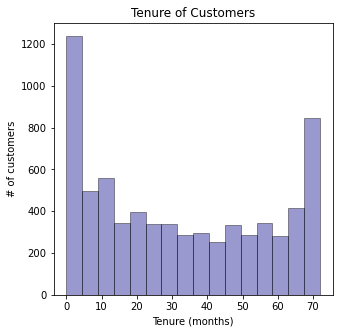

In [62]:
fig = plt.figure(figsize = (5,5))
ax = sns.distplot(customer_churn_df['tenure'],hist = True, kde = False, color = 'darkblue',
                 hist_kws = {'edgecolor' : 'black'},
                 kde_kws = {'linewidth' : 4})
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('# of customers')
ax.set_title('Tenure of Customers')

2. **Contract** : To understand the above graph, lets first look at the # of customers by different contracts.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '# of Customers by Contract Type')

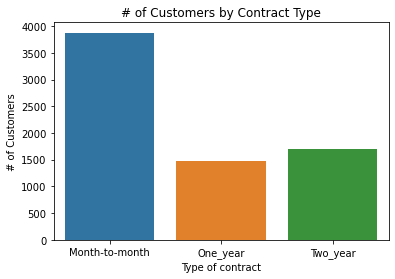

In [63]:
ax = sns.countplot(customer_churn_df['Contract'])
ax.set_xlabel('Type of contract')
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

As we can see from this graph most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

In [64]:
customer_churn_df['Contract'].value_counts()

Month-to-month    3875
Two_year          1695
One_year          1473
Name: Contract, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two year contract')

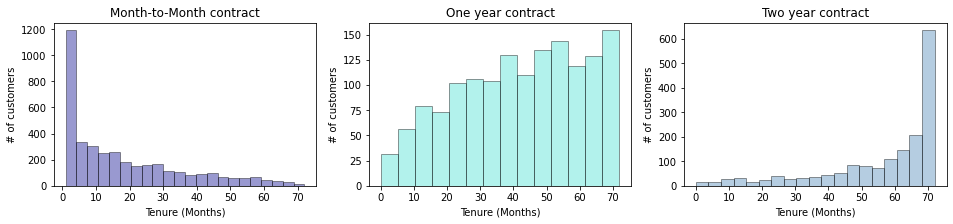

In [65]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,3))

ax = sns.distplot(customer_churn_df[customer_churn_df['Contract'] == 'Month-to-month']['tenure'], 
                  hist_kws = {'edgecolor': 'black'},color = 'darkblue',
                  kde = False, kde_kws = {'linewidth' : 4}, ax = axes[0]) #axes[rownumber, colnumber]
ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('# of customers')
ax.set_title('Month-to-Month contract')

ax = sns.distplot(customer_churn_df[customer_churn_df['Contract'] == 'One_year']['tenure'],
                  hist_kws = {'edgecolor': 'black'},color = 'turquoise',
                  kde = False, kde_kws = {'linewidth' : 4}, ax= axes[1])
ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('# of customers')
ax.set_title('One year contract')

ax = sns.distplot(customer_churn_df[customer_churn_df['Contract'] == 'Two_year']['tenure'], 
                 hist_kws = {'edgecolor': 'black'},color = 'steelblue',
                  kde = False, kde_kws = {'linewidth' : 4}, ax= axes[2])
ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('# of customers')
ax.set_title('Two year contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

This is also what we saw in the earlier chart on correlation with the churn rate.

C. Let us now look at the distribution of various services used by customers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

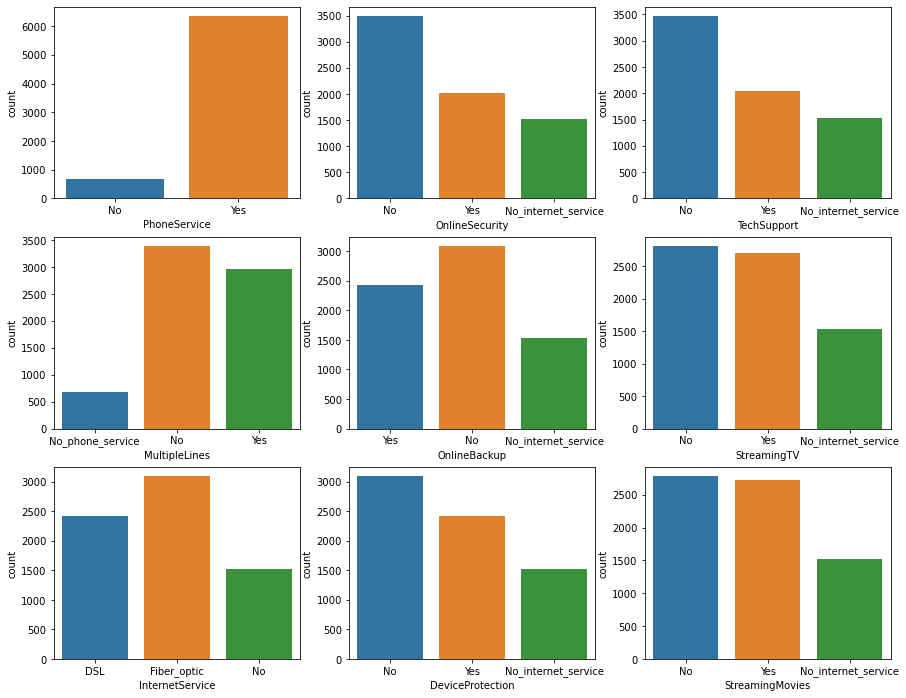

In [66]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15,12))

for i, item in enumerate(services):
    if i <3:
        ax = sns.countplot(customer_churn_df[item], ax = axes[i,0]) #axes[0,1,2 (rows), 1(column)]
    elif i >=3 and i<6:
        ax = sns.countplot(customer_churn_df[item], ax = axes[i-3,1]) # axes[3-(3,4,5) (rows), 1 (column)]
    elif i>=6 and i <9:
        ax = sns.countplot(customer_churn_df[item], ax = axes[i-6,2]) #axes[6-(6,7,8) (rows), 1(column)]
    
#     print(i)
#     print(item)


# s = ['Nidhi', 'Arjun', 'Urvashi', 'neha']
# for i, item in enumerate(s):
#     if i <2 :
#         print('stop at 2', s[i])
#     else :
#         print('not stopped at 2', s[i])

D.) Now let's take a quick look at the relation between monthly and total charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

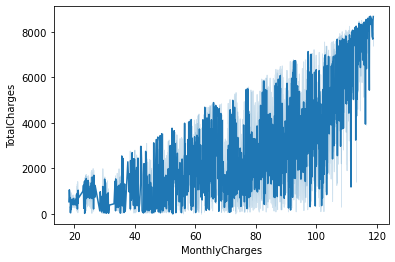

In [67]:
sns.lineplot(x = customer_churn_df['MonthlyCharges'], y = customer_churn_df['TotalCharges'])

We can see that the total charges increases as the monthly bill for a customer increases.

E.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot

Lets first look at the churn rate in our data

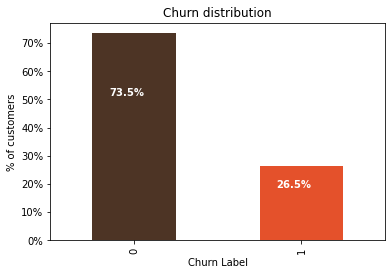

In [68]:
colors = ['#4D3425','#E4512B']
ax = (customer_churn_df['Churn'].value_counts()/len(customer_churn_df)*100).plot(kind = 'bar', color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customers')
ax.set_xlabel('Churn Label')
ax.set_title('Churn distribution')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+ .2*width, p.get_y() + .7*height), color = 'white', weight = 'bold')

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives.

Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

**Churn vs Tenure** :  As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.The churn seems to go down as tenure goes up

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

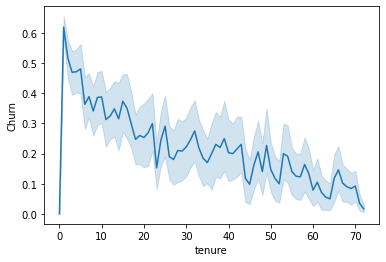

In [69]:
 sns.lineplot(x = customer_churn_df['tenure'], y = customer_churn_df['Churn'])
# sns.boxplot(x = customer_churn_df.Churn, y = customer_churn_df.tenure)

**Churn vs Contract Type**  : Similar to what we saw in correlation plot, customers who have high month-to-month contract have high churn rate

<Figure size 720x720 with 0 Axes>

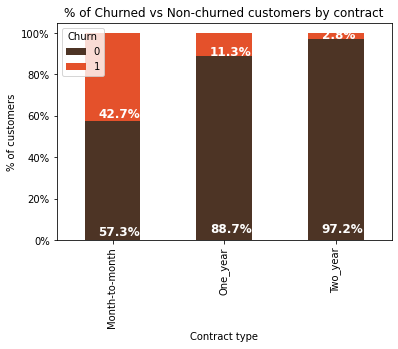

In [70]:
# sns.countplot(x = customer_churn_df['Contract'], hue = customer_churn_df['Churn'])
ax = plt.figure(figsize = (10,10))
colors = ['#4D3425','#E4512B']
churned_contracts = customer_churn_df[['Contract', 'Churn']].value_counts().unstack().T/customer_churn_df[['Contract', 'Churn']].value_counts().unstack().T.sum()*100
ax = churned_contracts.T.plot(kind = 'bar', stacked = True, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customers')
ax.set_xlabel('Contract type')
ax.legend(loc = 'best', title = 'Churn')
ax.set_title('% of Churned vs Non-churned customers by contract')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+ .25*width, p.get_y() + .04*height), color = 'white', weight = 'bold', size = 12)

**Churn by Seniority** : Senior Citizens have almost double the churn rate than younger population.

<Figure size 720x720 with 0 Axes>

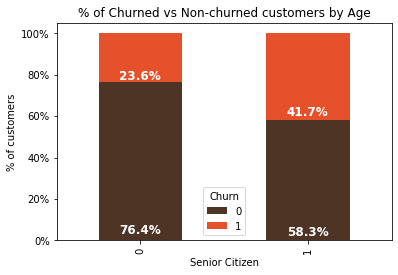

In [71]:
# sns.countplot(x = customer_churn_df['Contract'], hue = customer_churn_df['Churn'])
ax = plt.figure(figsize = (10,10))
colors = ['#4D3425','#E4512B']
churned_contracts = customer_churn_df[['SeniorCitizen', 'Churn']].value_counts().unstack().T/customer_churn_df[['SeniorCitizen', 'Churn']].value_counts().unstack().T.sum()*100
ax = churned_contracts.T.plot(kind = 'bar', stacked = True, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of customers')
ax.set_xlabel('Senior Citizen')
ax.legend(loc = 'best', title = 'Churn')
ax.set_title('% of Churned vs Non-churned customers by Age')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.1f}%'.format(height), (p.get_x()+ .25*width, p.get_y() + .04*height), color = 'white', weight = 'bold', size = 12)

**Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

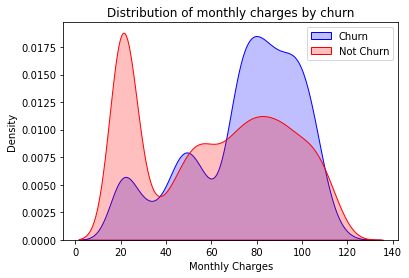

In [72]:
ax = sns.kdeplot(customer_churn_df[customer_churn_df['Churn'] == 1]['MonthlyCharges'], color = 'blue', shade = True)
ax = sns.kdeplot(customer_churn_df[customer_churn_df['Churn'] == 0]['MonthlyCharges'],color = 'red', shade = True)
ax.legend(["Churn","Not Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**Churn by Total Charges** : It seems that there is higer churn when the total charges are lower.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

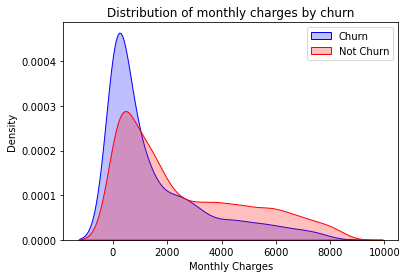

In [73]:
ax = sns.kdeplot(customer_churn_df[customer_churn_df['Churn'] == 1]['TotalCharges'], color = 'blue', shade = True)
ax = sns.kdeplot(customer_churn_df[customer_churn_df['Churn'] == 0]['TotalCharges'],color = 'red', shade = True)
ax.legend(["Churn","Not Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

**After going through the above EDA we will explore some predictive models and compare them**

We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost

**1. Logistic Regression**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


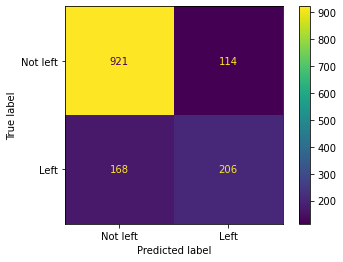

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
model = LogisticRegression()
scalar = MinMaxScaler(feature_range = (0,1))
scalar.fit(X_encoded)
X_encoded_standarised = scalar.transform(X_encoded)

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded_standarised, Y, test_size = 0.2, stratify = Y, 
                                                    random_state = 42)

model.fit(X_train, Y_train)
plot_confusion_matrix(model, X_test, Y_test, display_labels = ['Not left', 'Left'])

Logistic Regression was only able to predict **55%** **(206 out of 374)** of correct people who have left

**Feature Importance**

Text(0.5, 1.0, 'Lowest weights')

<Figure size 1440x576 with 0 Axes>

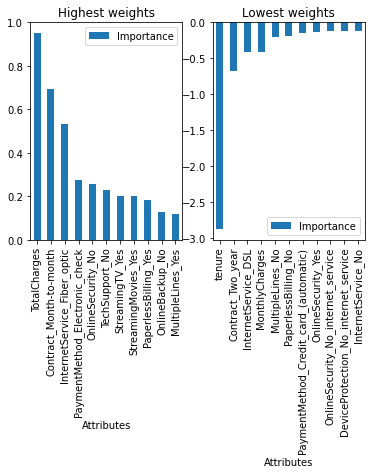

In [87]:
plt.figure(figsize = (20,8))
feature_importance = pd.DataFrame(data = {'Attributes' : X_encoded.columns, 'Importance' : model.coef_[0]})

highest_weights = feature_importance.sort_values(by = 'Importance',ascending = False)
lowest_weights  = feature_importance.sort_values(by = 'Importance',ascending = True)

fig, axes = plt.subplots(nrows = 1, ncols = 2)

ax = highest_weights.iloc[:11].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[0])
ax.set_title('Highest weights')
ax = lowest_weights.iloc[:11].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[1])
ax.set_title('Lowest weights')

# https://betterdatascience.com/feature-importance-python/

**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.

**2. Random Forest**

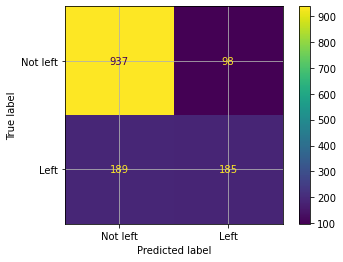

In [88]:
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier(n_estimators = 1000,criteria = max_depth = 30, oob_score = True, random_state = 50,
                                 max_features = 'auto', n_jobs = -1)

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded_standarised, Y, test_size = 0.2,stratify = Y)

model_rf.fit(X_train,Y_train)

plot_confusion_matrix(model_rf, X_test, Y_test, display_labels = ['Not left', 'Left'])
plt.grid(None)

Random Forest was only able to predict **49% (183 out of 374)** correct people who have left

**Feature Importance**

Text(0.5, 1.0, 'Low Important Features')

<Figure size 1440x576 with 0 Axes>

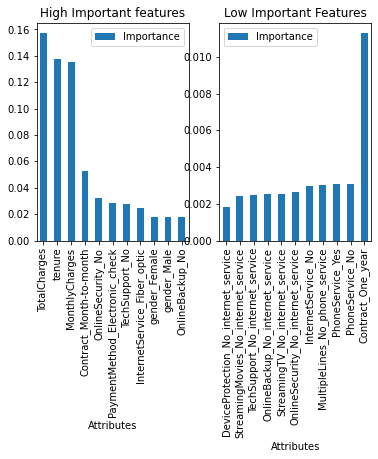

In [89]:
feature_importance = model_rf.feature_importances_
plt.figure(figsize = (20,8))
fig, axes = plt.subplots(nrows = 1, ncols = 2)
feature_importance_df = pd.DataFrame(data = {'Attributes' : X_encoded.columns, 'Importance' : feature_importance})
higher_weights = feature_importance_df.sort_values(by = 'Importance',ascending = False)
lower_weights = feature_importance_df.sort_values(by = 'Importance',ascending = True)
ax = higher_weights.iloc[:11,].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[0])
ax.set_title('High Important features')
ax = lower_weights.iloc[:11,].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[1])
ax.set_title('Low Important Features')

**Observations:**

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

**3. Support Vector Machines**

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

0.7153517269885555


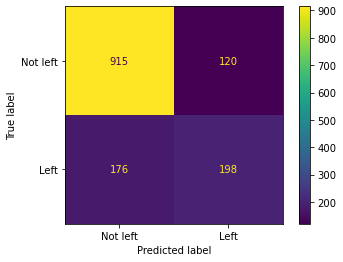

In [90]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
model_svm = SVC(kernel = 'linear',random_state = 42) #default kernel > rbf #we tried linear and rbf 
model_svm.fit(X_train, Y_train)
y_predictions = model.predict(X_test)
classification_svm = classification_report(Y_test,y_predictions) # precision and recall used when data is not balanced
roc_sore = roc_auc_score(Y_test,y_predictions)
print(classification_svm)
print(roc_sore) #when output is balanced
plot_confusion_matrix(model_svm,X_test, Y_test, display_labels = ['Not left', 'Left'])

With SVM, we are able to imporve the accuracy by **54% (204 out of 374)** correctly predicted people who left

**Feature Importance**

<AxesSubplot:xlabel='Attributes'>

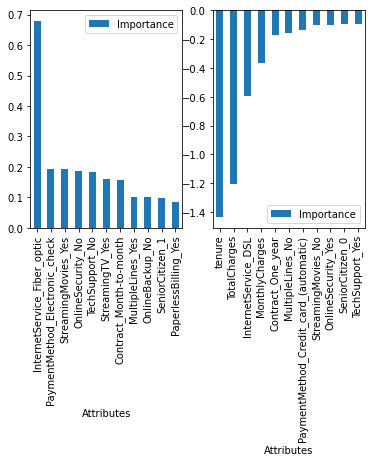

<Figure size 576x576 with 0 Axes>

In [91]:
fig, axes = plt.subplots(nrows =1, ncols = 2)
fig = plt.figure(figsize = (8,8))
feature_importance = pd.DataFrame(data = {'Attributes' : X_encoded.columns, 'Importance' : model_svm.coef_[0]})
highest_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
lowest_importance = feature_importance.sort_values(by = 'Importance', ascending = True)
highest_importance.iloc[:11].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[0])
lowest_importance.iloc[:11].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[1])

According to SVM, "Internet Fibre optic" and "Payment_Electronic_check" is more contributing factor to Churn than Tenure and Month-to-Month as confirmed by Linear regression and Random forest

**ADA Boost**

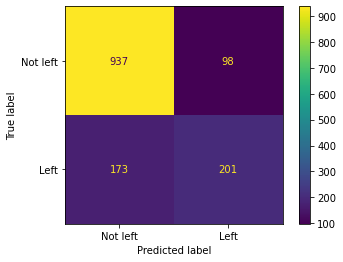

In [92]:
from sklearn.ensemble import AdaBoostClassifier
model_ac = AdaBoostClassifier(n_estimators= 150, learning_rate = 0.2)

#optimising with hyperparameter tuning 
#round 1
# param_grid = {'n_estimators' : [50,80,100], 'learning_rate': [0.01, 0.05, 0.10]}
# optimised_paramas = GridSearchCV(model_ac, param_grid =param_grid, cv = 3, n_jobs = -1 , scoring = 'roc_auc')  # scoring is aucpr since data is imbalnced
# optimised_paramas.fit(X_train, Y_train)
# optimised_paramas.best_params_
# results : {'learning_rate': 0.1, 'n_estimators': 100}

# #round 2 
# param_grid = {'n_estimators' : [100,150,200], 'learning_rate': [0.10, 0.20,0.50]}
# optimised_paramas = GridSearchCV(model_ac, param_grid =param_grid, cv = 3, n_jobs = -1 , scoring = 'roc_auc') 
# optimised_paramas.fit(X_train, Y_train)
# optimised_paramas.best_params_
# # {'learning_rate': 0.2, 'n_estimators': 150}


# #round 3
# param_grid = {'n_estimators' : [120,130,150], 'learning_rate': [0.10, 0.15,0.20]}
# optimised_paramas = GridSearchCV(model_ac, param_grid =param_grid, cv = 3, n_jobs = -1 , scoring = 'roc_auc') 
# optimised_paramas.fit(X_train, Y_train)
# optimised_paramas.best_params_
# {'learning_rate': 0.2, 'n_estimators': 150}

model_ac.fit(X_train, Y_train)
# y_predict = model_ac.predict(X_test)
# classification_report(Y_test, y_predict)
plot_confusion_matrix(model_ac,X_test, Y_test, display_labels = ['Not left', 'Left'])

With Adaboost, we can correctly identify people who left by **56% (211 out of 374)** with hyperparameter tuning

**Feature Importance**

Text(0.5, 1.0, 'Low Important Features')

<Figure size 1440x576 with 0 Axes>

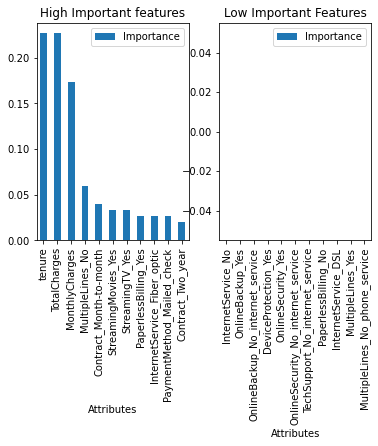

In [93]:
feature_importance = model_ac.feature_importances_
plt.figure(figsize = (20,8))
fig, axes = plt.subplots(nrows = 1, ncols = 2)
feature_importance_df = pd.DataFrame(data = {'Attributes' : X_encoded.columns, 'Importance' : feature_importance})
higher_weights = feature_importance_df.sort_values(by = 'Importance',ascending = False)
lower_weights = feature_importance_df.sort_values(by = 'Importance',ascending = True)
ax = higher_weights.iloc[:11,].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[0])
ax.set_title('High Important features')
ax = lower_weights.iloc[:11,].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[1])
ax.set_title('Low Important Features')

Feature importance in **Adaboost** is very close to **Random forest** classifying **Total charges** and **Monthly charges** as most important variables 

**Gradient Boosting Classifier**

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1113
           1       0.53      0.67      0.59       296

    accuracy                           0.81      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.83      0.81      0.81      1409



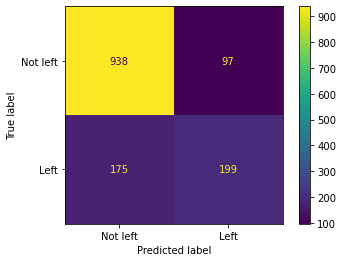

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
# model_gc = GradientBoostingClassifier()

# round 1 
# param_grid = {'learning_rate' : [0.10,0.25,0.75],'n_estimators' : [100,250,500],
#              'max_depth' : [3,8,20], }
#  #best_params = {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}

# round 2 
param_grid = {'learning_rate' : [0.05,0.07,0.10],'n_estimators' : [50,70,100], 'max_depth' : [1,2,3]}

optimal_grid = RandomizedSearchCV(estimator = model_gc, param_distributions = param_grid, scoring = 'roc_auc', cv = 5,
                           verbose = True, n_iter = 50, n_jobs = 10)
{'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.1}

model_gc = GradientBoostingClassifier(n_estimators = 100,max_depth = 2, learning_rate = 0.1 )

model_gc.fit(X_train, Y_train)
X_test_predictions = model_gc.predict(X_test)
plot_confusion_matrix(model_gc, X_test, Y_test,display_labels = ['Not left', 'Left'])
cf_gb = classification_report(X_test_predictions, Y_test)
print(cf_gb)

With **Gradient Boosting**, we can correctly identify people who left by **53% (199 out of 374)** with hyperparameter tuning

**Feature Importance**

                              Attributes  Importance
3                          gender_Female         0.0
4                            gender_Male         0.0
7                             Partner_No         0.0
8                            Partner_Yes         0.0
14        MultipleLines_No_phone_service         0.0
15                     MultipleLines_Yes         0.0
16                   InternetService_DSL         0.0
18                    InternetService_No         0.0
20    OnlineSecurity_No_internet_service         0.0
21                    OnlineSecurity_Yes         0.0
23      OnlineBackup_No_internet_service         0.0
24                      OnlineBackup_Yes         0.0
26  DeviceProtection_No_internet_service         0.0
27                  DeviceProtection_Yes         0.0
29       TechSupport_No_internet_service         0.0
30                       TechSupport_Yes         0.0
31                        StreamingTV_No         0.0
32       StreamingTV_No_internet_service      

<Figure size 1440x576 with 0 Axes>

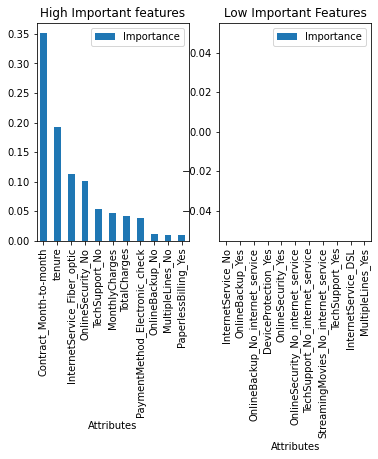

In [140]:
feature_importance = model_gc.feature_importances_
plt.figure(figsize = (20,8))
fig, axes = plt.subplots(nrows = 1, ncols = 2)
feature_importance_df = pd.DataFrame(data = {'Attributes' : X_encoded.columns, 'Importance' : feature_importance})
higher_weights = feature_importance_df.sort_values(by = 'Importance',ascending = False)
lower_weights = feature_importance_df.sort_values(by = 'Importance',ascending = True)
ax = higher_weights.iloc[:11,].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[0])
ax.set_title('High Important features')
ax = lower_weights.iloc[:11,].plot(kind = 'bar', x = 'Attributes', y = 'Importance', ax = axes[1])
ax.set_title('Low Important Features')
print(feature_importance_df[feature_importance_df['Importance'] == 0])

Feature importance in **Gradient Boosting** claasified **Contract_Month_to_Month** and **Tenure** as most important variables 

### Build a preliminary XGBoost Model

At long last, the data is correctly formatted for making **XGBoost** model. Now, we simply split the data into training and testing sets and build the model. However, let's first observe that this data is imbalanced by dividing the number of people who **left** the company i.e. Y = 1, by total number of people in dataset

In [388]:
sum(Y)/len(Y)

0.2653698707936959

In [389]:
Y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

So we see that only **27%** of people in dataset left the company. Because of this, when we split the data into training and testing, we will split using stratification in order to maintain the same % of people who left the company in both *training* and *testing* dataset

In [390]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, random_state = 42, stratify = Y)

In [391]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5282, 46), (1761, 46), (5282,), (1761,))

In [392]:
sum(Y_train)/len(Y_train)

0.2654297614539947

In [393]:
sum(Y_test)/len(Y_test)

0.26519023282226006

**NOTE**  To avoid how overfitting, we need to find optimal number of tress that should be build in each iteration. Instead of using Cross-validation, we will be using **early stopping** to stop building when they are no longer improving the situation

In [394]:
clg_xgb = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42)
#missing none takes in 0 as default for missing

clg_xgb.fit(X_train, Y_train, 
           verbose = True, 
           early_stopping_rounds = 10, 
           eval_metric = 'aucpr',
           eval_set = [(X_test, Y_test)])

[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680
[11]	validation_0-aucpr:0.63828


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Okay, we have build an **XGBoost** model, let's see how it performs on testing dataset and draw a **confusion matrix**

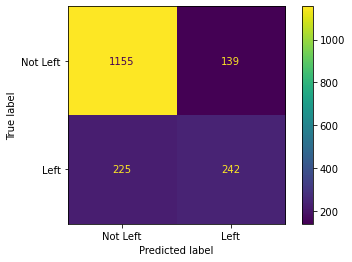

In [395]:
plot_confusion_matrix(clg_xgb, X_test, Y_test, values_format = 'd',display_labels = ['Not Left', 'Left'])

In [396]:
Y_test.value_counts()

0    1294
1     467
Name: Churn, dtype: int64

In confusion matrix, we see that out of **1294** people that did not leave, **1155** **(89%)** people were correctly classified which is good. However, out of **467** people that left, only **242** **(52%)** people were not correctly classified. Part of the problem was because data was imbalanced which we see earlier and we see that now in Confusion matrix. Because people leaving costs company a lot, we would like to capture more of the people that left. **XGBoost** has a parameter *scale_pos_weight* that helps to add penalty for incorrectly classifying minority class. We will also try to improve the overall performance by set of Hyperparamter tuning

### Optimise Parameters using CrossValidation and GridSearch

**XGBoost** has a lot of *hyperparameters*, parameters that we have to manually configure and are not determined by **XGBoost** itself including max_depth, maximum tree depth, learning_rate, gamma (parameter that encourages pruning), reg_lambda (the regularisation parameter lambda). So let's try to find optimal values for hyperparameter in hopes that we can improve the accuracy with **Testing Dataset**

**NOTE:** Since there are many *hyperparameters* we will use GridSearchCV(). We specify a bunch of hyperparameters with GridSearchCV() and choose the best combination that work for us.

In [397]:
# When data is imbalanced, the XGBoost manual says :
#If you care only about overall performance metric(AUC) of prediction
# *Balance positive and negative weights via scaled_pos_weight
# *Use AUC for evaluation

## We are running GridSearchCV() on subsets of rows and features subsequentally instead of all in order to optimize the 
## optimise parameters in short period of time


##Round 1
# param_grid = {
#     'max_depth': [3,4,5],
#     'reg_lambda': [0,1, 10],
#     'gamma': [0,0.25,1],
#     'learning_rate': [0.1,0.01,0.05],
#     'scale_pos_weight': [2,3,5] 
# }

#bestparams : {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 2}

##Round 2 


param_grid = {
    'max_depth': [4],
    'reg_lambda': [10, 15, 20],
    'gamma': [0,0.05,0.10],
    'learning_rate': [0.1,0.25,0.50],
    'scale_pos_weight': [1,2,3] 
}


optimal_grid = GridSearchCV(estimator = xgb.XGBClassifier(objective = 'binary:logistic', seed = 42,
                                                         subsample = 0.9, colsample_bytree = 0.5),
                           param_grid =param_grid, verbose = 2, scoring = 'roc_auc', n_jobs = 10, cv = 3)

optimal_grid.fit(X_train, Y_train, early_stopping_rounds = 10,
                eval_metric = 'aucpr',
                eval_set = [(X_test, Y_test)], verbose = True)

print(optimal_grid.best_params_)

#{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 2}

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[0]	validation_0-aucpr:0.59673
[1]	validation_0-aucpr:0.59714
[2]	validation_0-aucpr:0.60240
[3]	validation_0-aucpr:0.60535
[4]	validation_0-aucpr:0.61386
[5]	validation_0-aucpr:0.61718
[6]	validation_0-aucpr:0.61976
[7]	validation_0-aucpr:0.63092
[8]	validation_0-aucpr:0.62819
[9]	validation_0-aucpr:0.62538
[10]	validation_0-aucpr:0.62580
[11]	validation_0-aucpr:0.62608
[12]	validation_0-aucpr:0.63273
[13]	validation_0-aucpr:0.63895
[14]	validation_0-aucpr:0.63475
[15]	validation_0-aucpr:0.63416
[16]	validation_0-aucpr:0.63385


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-aucpr:0.63941
[18]	validation_0-aucpr:0.63894
[19]	validation_0-aucpr:0.64387
[20]	validation_0-aucpr:0.64536
[21]	validation_0-aucpr:0.64686
[22]	validation_0-aucpr:0.64843
[23]	validation_0-aucpr:0.64919
[24]	validation_0-aucpr:0.64896
[25]	validation_0-aucpr:0.64851
[26]	validation_0-aucpr:0.64925
[27]	validation_0-aucpr:0.64947
[28]	validation_0-aucpr:0.65395
[29]	validation_0-aucpr:0.65339
[30]	validation_0-aucpr:0.65392
[31]	validation_0-aucpr:0.65364
[32]	validation_0-aucpr:0.65397
[33]	validation_0-aucpr:0.65441
[34]	validation_0-aucpr:0.65516
[35]	validation_0-aucpr:0.65555
[36]	validation_0-aucpr:0.65634
[37]	validation_0-aucpr:0.65588
[38]	validation_0-aucpr:0.65483
[39]	validation_0-aucpr:0.65618
[40]	validation_0-aucpr:0.65649
[41]	validation_0-aucpr:0.65590
[42]	validation_0-aucpr:0.65506
[43]	validation_0-aucpr:0.65573
[44]	validation_0-aucpr:0.65609
[45]	validation_0-aucpr:0.65516
[46]	validation_0-aucpr:0.65485
[47]	validation_0-aucpr:0.65485
[48]	val

So after testing all possible combinations with **Cross validation**, we see that we should set our parameters *{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'reg_lambda': 10, 'scale_pos_weight': 2}*

### Building, Evaluating, Drawing and Interpreting the optimized XGBoost model

In [398]:
clf_xgb = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', 
                          gamma = 0, learning_rate = 0.1, 
                        max_depth= 4, reg_lambda =10, 
                            scale_pos_weight = 2, subsample = 0.8,  colsample_bytree = 0.9)

clf_xgb.fit(X_train, Y_train, verbose = True, 
            early_stopping_rounds = 10,
            eval_metric = 'aucpr',
            eval_set = [(X_test, Y_test)])

[0]	validation_0-aucpr:0.58205
[1]	validation_0-aucpr:0.58986
[2]	validation_0-aucpr:0.59789
[3]	validation_0-aucpr:0.60394
[4]	validation_0-aucpr:0.60552
[5]	validation_0-aucpr:0.61027
[6]	validation_0-aucpr:0.60784
[7]	validation_0-aucpr:0.63017
[8]	validation_0-aucpr:0.62896
[9]	validation_0-aucpr:0.62944
[10]	validation_0-aucpr:0.63095
[11]	validation_0-aucpr:0.63679
[12]	validation_0-aucpr:0.64266
[13]	validation_0-aucpr:0.64673
[14]	validation_0-aucpr:0.64385
[15]	validation_0-aucpr:0.64245
[16]	validation_0-aucpr:0.64302
[17]	validation_0-aucpr:0.64685
[18]	validation_0-aucpr:0.64501
[19]	validation_0-aucpr:0.64556
[20]	validation_0-aucpr:0.64623
[21]	validation_0-aucpr:0.64660
[22]	validation_0-aucpr:0.65054
[23]	validation_0-aucpr:0.64939
[24]	validation_0-aucpr:0.64854
[25]	validation_0-aucpr:0.65068
[26]	validation_0-aucpr:0.65131
[27]	validation_0-aucpr:0.65130
[28]	validation_0-aucpr:0.65401
[29]	validation_0-aucpr:0.65375
[30]	validation_0-aucpr:0.65625
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

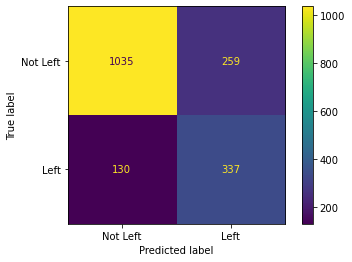

In [399]:
plot_confusion_matrix(clf_xgb, X_test, Y_test, values_format = 'd',display_labels = ['Not Left', 'Left'])

We see that optimised **XGBoost** tree does a much better job at identifying people who **left** Out of **467** people who left, **337 (72%)** were correctly identified. Before optimization, we only correctly identified, **51%**. However, this improvement came at an expense of not being able to correctly identify people who did not leave. Before optimisation, we correctly identified **1155 (81%)** who did not leave but now we can only classify **1035 (79%)**. That being said, the trade-off might be better because now the company can focus its resources on the people that leave so they can make policies to retain them 

The last thing we can do is build one of the **XGBoost Tree** and interpret it

In [468]:
##If we want to get information like gain and cover at each node in first tree
##we just build first tree, otherwise we will get avg over all the trees

clf_xgb = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', 
                          gamma = 0, learning_rate = 0.1, 
                        max_depth= 4, reg_lambda =10, 
                            scale_pos_weight = 2, subsample = 0.8,  colsample_bytree = 0.9, 
                           n_estimators = 1) #we set this to 1 so we get first tree with gain, cover, etc.

clf_xgb.fit(X_train, Y_train)


bst = clf_xgb.get_booster()

for importance_type in ['weight', 'gain', 'cover', 'total_gain', 'total_cover']:
    print(importance_type, bst.get_score(importance_type = importance_type))

    #we usually use get_booster.get_score() for feature_selection acc to a particular importance_type
    
#can be used for feature selection if number of variables too huge

feature_important = clf_xgb.get_booster().get_score(importance_type='weight') # ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
feature_important_df = pd.DataFrame(index = feature_important.keys(), data = feature_important.values(), 
             columns = ['scores'])

feature_important_df.sort_values(by = 'scores', ascending = False)

##now print out weight, gain, cover, etc. for the tree
#weight > number of times a feature is used in branch or node across all trees
#gain > the average gain across all splits a feature is used in 
#cover > average cover across all splits a feature is used in 
#total_gain > total gain across all splits a feature is used in
#total_cover > total_cover across all splits a feature is used in
##Note : Since we only built one tree, gain = total_gain, cover = total_cover

# xgb.to_graphviz(clf_xgb, size = "10 10", num_trees = 0)

# #to save figure 
# graph_data = xgb.to_graphviz(clf_xgb, size = "10 10", num_trees = 0)

# graph_data.view(filename = 'xgboost_tree_customer_churn.pdf') ##save as pdf 


{'tenure': 2.0, 'TotalCharges': 2.0, 'InternetService_Fiber_optic': 2.0, 'OnlineSecurity_No': 1.0, 'TechSupport_No': 2.0, 'Contract_Month-to-month': 1.0, 'Contract_One_year': 1.0, 'PaperlessBilling_No': 1.0, 'PaymentMethod_Mailed_check': 1.0}
{'tenure': 100.44841003417969, 'TotalCharges': 1.784372329711914, 'InternetService_Fiber_optic': 133.29974365234375, 'OnlineSecurity_No': 0.8470458984375, 'TechSupport_No': 31.556385040283203, 'Contract_Month-to-month': 1050.6810302734375, 'Contract_One_year': 7.0782928466796875, 'PaperlessBilling_No': 19.020586013793945, 'PaymentMethod_Mailed_check': 4.443809509277344}
{'tenure': 413.0, 'TotalCharges': 174.75, 'InternetService_Fiber_optic': 668.125, 'OnlineSecurity_No': 343.5, 'TechSupport_No': 165.875, 'Contract_Month-to-month': 1336.25, 'Contract_One_year': 166.75, 'PaperlessBilling_No': 242.0, 'PaymentMethod_Mailed_check': 64.5}
{'tenure': 200.89682006835938, 'TotalCharges': 3.568744659423828, 'InternetService_Fiber_optic': 266.5994873046875, 

,scores
tenure,2.0
TotalCharges,2.0
InternetService_Fiber_optic,2.0
TechSupport_No,2.0
OnlineSecurity_No,1.0
Contract_Month-to-month,1.0
Contract_One_year,1.0
PaperlessBilling_No,1.0
PaymentMethod_Mailed_check,1.0


We can use xgn.get_booster().get_score() for feature selection and map importance type across multiple parameters like weight,gain, cover, etc. 

In [424]:
# conda install -c conda-forge python-graphviz